In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/public_test.csv
/kaggle/input/train.csv


In [2]:
import pandas as pd
train = pd.read_csv("../input/train.csv")
train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


In [3]:
test = pd.read_csv("../input/public_test.csv")
test.head()

,id,year_month,text
0,340000,2019-01,XXX고객님! 안녕하세요? 새롭게 시작하는 한 주 행복 가득하시길 기원합니다. 지난...
1,340001,2019-01,긴급 안내 XXX은행 가락동 지점 - 헬리오XXX 기본XXX 대출이자를 ...
2,340002,2019-01,XXX 고객님 안녕하세요올해는 미세먼지가 유난인거 같습니다.엊그제 새해가 시작된거같...
3,340003,2019-01,XXX 고객님찾아온 행운을 잡으셨나요? 못잡으셨다면 이번에 다시 잡으시길 기원합니다...
4,340004,2019-01,XXX 고객님새해 복 많이 받으세요 XXX은행 코스트코 퇴직연금 담당자입니다. 고...


In [ ]:
all_text = pd.concat((train['text'],test['text']))

- 위 코드는 train의 text 열과 test의 text 열을 merge 시킨것임.
- 밑 에서 keras의 Tokenizer 라이브러리로 단어token이나 문장 token으로 분리하기 위함
- merge 시킨 이유는 train에서는 문자가 등장했지만 ,test에는 없는 문자가 나오면 어떻게 학습해야 하는지 몰라서 train과 test 두개 동시에 fit on texts 처리(concat)

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
tk = Tokenizer()
tk.fit_on_texts(list(train['text'])+list(test['text']))
# **문제점** 중요
#train에는 등장했지만 test에는 없는 문자가 나와면 어떻게 바뀌여하는지 학습이 안됨 -> train,test 두개 동시 fit on texts 처리(concat처리)

In [5]:
train.head()

,id,year_month,text,smishing
0,0,2017-01,XXX은행성산XXX팀장입니다.행복한주말되세요,0
1,1,2017-01,오늘도많이웃으시는하루시작하세요XXX은행 진월동VIP라운지 XXX올림,0
2,2,2017-01,안녕하십니까 고객님. XXX은행입니다.금일 납부하셔야 할 금액은 153600원 입니...,0
3,4,2017-01,XXX 고객님안녕하세요XXX은행 XXX지점입니다지난 한 해 동안 저희 XXX지점에 ...,0
4,5,2017-01,1월은 새로움이 가득XXX입니다.올 한해 더 많이행복한 한해되시길바랍니다,0


9         (광고)XXXBaXXX고객님들 뒤엔XXX 언제나 XXX새로운 마음가짐으로 새롭게 준...
23        (광고)XXX추가 XXX품   특판 안내문XXX 지점에서 취급하고 있는 여신 XXX...
31        (광고)XXX신용관리 XXX 알고 싶다나의 신용과 재무상태는 직접 관리해야지 누군가...
40        (광고)안녕하세요수신을 희망하지 않으실 경우에는 거부 라는 답장을 주시면 KISA ...
50        (광고)한국citi bank 나의 대출한도와 금리는? 대출때문에 고민하고 있다거나 ...
                                ...                        
295927    (광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...
295932    (광고)XXX금전을 요구하는건 사기입니다. 유의하세요!1.부득이하게 높은 이자를 내...
295934    (광고)XXX나의 한도금리를 알아보자금전을 요구하는건 사기입니다. 유의하세요!1.부...
295936    (광고) XXX항상 (XXX국민)은행을 이용해주셔서 감사합니다. 2018년 12월 ...
295937    (광고)XXX가이드 변경 안내정확하고 올바른 신용상품 당사상품의 자격기준과 심사기준...
Name: text, Length: 18703, dtype: object

In [7]:
tk.word_index # 빈도수가 많이 등장하는 rank(오름차순)

{'xxx': 1,
 'xxx은행': 2,
 '고객님': 3,
 '감사합니다': 4,
 '수': 5,
 '바랍니다': 6,
 '2': 7,
 '3': 8,
 '행복한': 9,
 '있습니다': 10,
 '광고': 11,
 '저희': 12,
 '및': 13,
 '항상': 14,
 '고객님의': 15,
 '하루': 16,
 '1': 17,
 '드립니다': 18,
 'xxx올림': 19,
 '꼭': 20,
 '주셔서': 21,
 '주말': 22,
 '최대': 23,
 '감사드립니다': 24,
 '따라': 25,
 '있는': 26,
 '4': 27,
 '주시면': 28,
 '즐거운': 29,
 '5': 30,
 '부탁드립니다': 31,
 '올림': 32,
 '안녕하세요': 33,
 '가능': 34,
 '보내세요': 35,
 '경우': 36,
 '한도': 37,
 '좋은': 38,
 '더': 39,
 '오늘도': 40,
 '또는': 41,
 '한': 42,
 '상담': 43,
 '합니다': 44,
 '소중한': 45,
 '상품': 46,
 '금리': 47,
 '많이': 48,
 '까지': 49,
 '2017': 50,
 '매우': 51,
 'xxx무료수신거부xxx': 52,
 '고객님께': 53,
 '최선을': 54,
 '답장을': 55,
 '가득한': 56,
 '오늘': 57,
 '등': 58,
 'ㅡ': 59,
 '대한': 60,
 '바로': 61,
 '거래해': 62,
 '되세요': 63,
 '0': 64,
 '대출': 65,
 '되시길': 66,
 '진심으로': 67,
 '전화를': 68,
 '가능합니다': 69,
 '최저': 70,
 '늘': 71,
 '고객님께서': 72,
 '함께': 73,
 '감사드리며': 74,
 '거래': 75,
 '시간': 76,
 '있으시면': 77,
 '고객만족도': 78,
 '통해': 79,
 '월': 80,
 '언제든지': 81,
 '차등적용': 82,
 '잘': 83,
 '6': 84,
 '도움이': 85,
 '다양한': 86

In [8]:
len(tk.word_index)

448902

In [9]:
# 등록된 문자를 숫자로 바꿔줘야함(tk안에만등록)
train_text = tk.texts_to_sequences(train['text']) # train의 text를 숫자로 바꿔서 변수에 저장

test_text = tk.texts_to_sequences(test['text']) # test의 text를 숫자로 바꿔서 변수에 저장


In [10]:
# 각각의 데이터에 칼럼의 갯수가 똑같아야지 모델이 학습을 시작할수있음.
# 가장 길 길이의 텍스트에 맞추면 됨.
# 여기선 가장큰 길이의 문자가 train의 317 이기때문에 317에 맞춰야함.

In [11]:
# 1. 텍스트길이를 317 맥스값에 맞출것이아니라 잘라준다
# ->데이터가 날아가면 손해일것같지만 다른 데이터들이 많아서 괜찮다.
# -> 맥시멈값을 줄여주면 효율이좋아진다 -> 다른데이터들과의 길이 갭차이가 작아져서

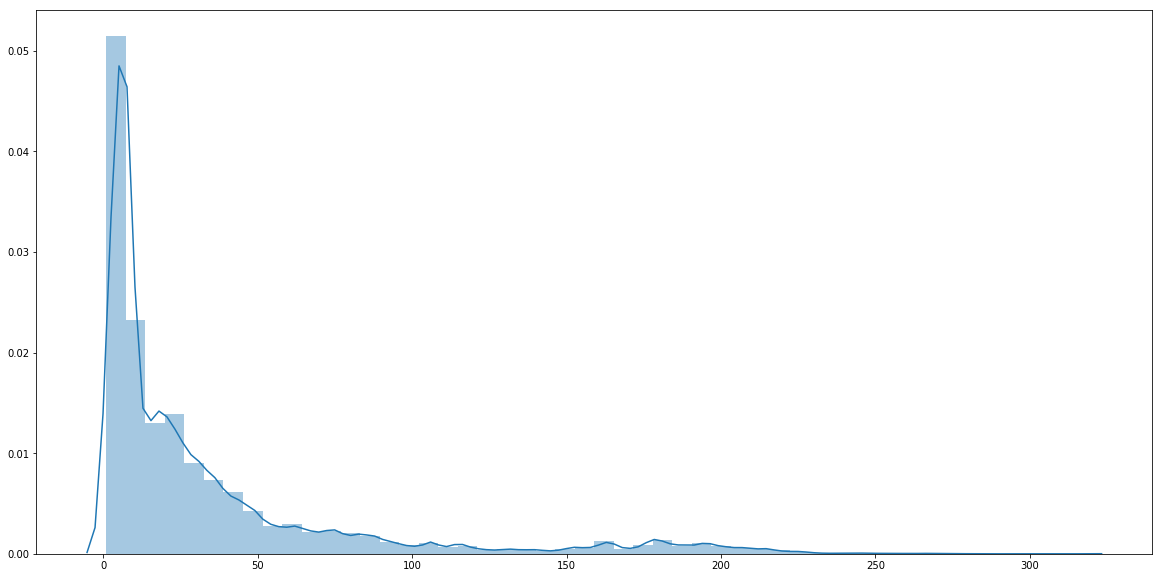

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
a,b = plt.subplots(1,1,figsize=(20,10)) #밑그림
sns.distplot(pd.Series(train_text).apply(len)) #분포표 displot
# 분포를 보고 length 값을 몇으로 할것인지 가장 효율적인지 보고 진행해준다

In [13]:
pd.Series(train_text).apply(lambda x:len(x)).max()

317

In [14]:
pd.Series(test_text).apply(lambda x:len(x)).max()

278

In [15]:
from keras.preprocessing.sequence import pad_sequences
pad_train = pad_sequences(train_text,maxlen = 100) 
pad_train
# 그래프를 보니 문자열 길이가 100 이하로만 설정해도 학습을 할 수 있다.(100이하인 문자열 데이터들이 매우많기때문에 효율적인 학습을 위해서 100보다 문자열이 긴 것들은 날려버린다.)

Using TensorFlow backend.


array([[     0,      0,      0, ...,      0, 189820,   5188],
       [     0,      0,      0, ...,  95530,  95531,     19],
       [     0,      0,      0, ...,     48,   1395,   5509],
       ...,
       [     0,      0,      0, ...,      1,      1,     32],
       [     0,      0,      0, ...,   3013,      2,   2511],
       [   132,     80,    146, ...,     16,     35,   5884]], dtype=int32)

In [16]:
pad_test = pad_sequences(test_text,maxlen = 100)
pad_test

array([[ 4297, 41961, 11649, ...,    63,     4, 23284],
       [25455,   169, 18558, ...,   290,   480,     4],
       [    0,     0,     0, ..., 35497,   468,  8899],
       ...,
       [    0,     0,     0, ...,   100,    59,  6774],
       [19094,   244, 95527, ...,    52,     1,     1],
       [    0,     0,     0, ...,    52,     1,     1]], dtype=int32)

In [17]:
# 대부분의 텍스트대회의 데이터는 뒷쪽 데이터가 훨씬중요하다(한국말은 끝까지 들어봐야한다.)
# 뒷쪽의 데이터를 남겨두는게 중요하다.
# 기본값이 앞쪽의 데이터를 날리도록 되어있다.

In [18]:
# 딥러닝 모델을 쌓는 방법 두가지꼭 필요함
from keras import Sequential # 1. 가볍고 쉽고 간단하게 하나씩 쌓는다
from keras.layers import Dense,Embedding,Flatten  
# 가장 많이 쓰는 층 불러온다 , # 텍스트는 임베드 층이 반드시있어야함 어떤 텍스트든,# 차원을 축소시킴(flatten)

In [19]:
# 모델쌓기를 시작하겠습니다.
model = Sequential() # 객체생성

model.add(Embedding(448903,25,input_length=100)) 
# 입력층을 쌓겠다. 옵션 3가지 넣어야함(1. 전체데이터셋에대한 단어종류의 갯수(len(tk.word_index)),2.차원의 갯수를 설정,3.하나의 데이터당 몇개의 단어가 몇개가들어오는지 크기설정)

model.add(Flatten())
# 2차원인 애를 flatten 통해서 1차원으로 바꾸워줌(딥러닝에서는 네트워크 구조 연결이 중요하다)

model.add(Dense(5,activation = 'relu'))
model.add(Dense(1,activation ='sigmoid')) 
# 스미잉 인지 아닌지 출력이 되어야함(확률값으로)
# 출력층,옵션 2가지 (1.정답클래스의 갯수가 들어가야함, )
# 정답클래스의 갯수를 1을 넣었을경우엔(어떠한 확률) sigmoid 활성화 함수를, 2를 넣었을때는 softmax 활성화 함수를 넣어줘야함

model.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics= ['acc']) # 모델쌓기 끝났다고 선언해줘야함. 
# 옵션 3가지 
# 1.loss = 'sparse_categorycalcrossentropy'는 다중분류 썼을때 sparse_를쓰면 회귀가아닌 분류문제로 인식함(one-hot-encoding 할 필요없음)(필수)
# 2.optimizer = adam은학습효과 빠르고 학습 잘함 (필수)
# 3.metrics = ['acc]' <- 평가방식은 정확도로 보겠다.(선택)
# 딥러닝은 w 만 잘찾으면 됨!(어떻게? -> 손실함수값이 작아지는 방향으로 찾겠다.)



In [20]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 
# 자동으로 모델이 validation loss가 안좋아지면 이정도면 과적합이 일어나구 있구나 하고 자동으로 멈췸
# 모델이 최적의 순간을 저장해야되는데 학습시 어느순간 안좋아진다 그래서,최적의 가중치를 가지도록 
# 가장 점수가 잘 나올 가중치를 저장하고 예측에 사용한다.-> modelcheckpoint

es = EarlyStopping(patience = 3) #이미지할때 loss가 크면 많이 참을수있도록 patience를 5이상으로 놓는다 텍스트는 안정적인편이여서 괜찮
mc = ModelCheckpoint('best.h5',save_best_only = True) #최적의 순간만 저장하겠다.

In [21]:
model.fit(pad_train,train['smishing'],epochs =20,validation_split = 0.1,batch_size=128,callbacks=[es,mc]) 

# 옵션값 1.은 학습횟수를 결정해줌 5번 반복횟수 2. 전체데이터셋의 10%만 학습에 이용하지않고 평가점수에만 이용함
# 학습에 이용하지 않는 이유는 overfitting.
# batch_size 는 속도조절(빠르게함)

/opt/conda/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 266350 samples, validate on 29595 samples
Epoch 1/20
266350/266350 [==============================] - 16s 59us/step - loss: 0.0088 - acc: 0.9986 - val_loss: 0.0033 - val_acc: 0.9994
Epoch 2/20
266350/266350 [==============================] - 14s 54us/step - loss: 2.4857e-04 - acc: 1.0000 - val_loss: 0.0034 - val_acc: 0.9991
Epoch 3/20
266350/266350 [==============================] - 14s 54us/step - loss: 1.1935e-04 - acc: 1.0000 - val_loss: 0.0041 - val_acc: 0.9992
Epoch 4/20
266350/266350 [==============================] - 15s 57us/step - loss: 5.0330e-05 - acc: 1.0000 - val_loss: 0.0047 - val_acc: 0.9992


In [22]:
result = model.predict(pad_test,batch_size=128)

In [23]:
result

array([[1.0759887e-08],
       [1.4554095e-04],
       [1.5344898e-07],
       ...,
       [7.0539730e-10],
       [2.9629868e-07],
       [3.2997583e-08]], dtype=float32)

In [24]:
test['smishing'] = result
sub = test[['id','smishing']] #컬럼여러개로 접근할때 리스트괄호 2개
sub.to_csv('kb_competition2.csv',index = False)